In [ ]:
import numpy as np
import pandas as pd
import re
import os

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.dpi'] = 500
rcParams['savefig.dpi'] = 500
rcParams['font.family'] = 'Arial'
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['figure.titlesize'] = 16

In [ ]:
# Read the original dataset
from google.colab import drive
drive.mount('/content/drive')


def load_datafiles(read_dir):
    """Read data files from the specified directory into a dataframe."""
    files = os.listdir(read_dir)
    files = [f for f in files if f.endswith(".xlsx")]
    files = sorted(files)
    dataframes = []
    for file in files:
        filepath = os.path.join(read_dir, file)
        df = pd.read_excel(filepath, skiprows=6, engine = 'openpyxl')
        print(filepath)
        dataframes.append(df)
    df = pd.concat(dataframes, ignore_index=True)
    return df

df = load_datafiles('/content/drive/My Drive/48hours_US_correctDate')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


/content/drive/My Drive/48hours_US_correctDate/2045252774_Putin+Interview.xlsx


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


/content/drive/My Drive/48hours_US_correctDate/2045256583_Putin+Interview.xlsx


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


/content/drive/My Drive/48hours_US_correctDate/2045282527_Putin+Interview.xlsx


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


/content/drive/My Drive/48hours_US_correctDate/2045317047_Putin+Interview.xlsx
/content/drive/My Drive/48hours_US_correctDate/2045338947_Putin+Interview.xlsx
/content/drive/My Drive/48hours_US_correctDate/2045347360_Putin+Interview.xlsx


In [ ]:
df['DateTime'] = df['Date'].astype(str).str.replace('.0', '', regex=False)
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df = df.sort_values(by='DateTime', ascending=True)
df.head(5)

,Query Id,Query Name,Date,Title,Url,Domain,Sentiment,Page Type,Language,Country Code,...,Station Name,Subreddit,Subreddit Subscribers,Subscriptions,Tiktok Comments,Tiktok Likes,Tiktok Shares,Weblog Title,Emotion,DateTime
190709,2002001452,Putin Interview,2024-02-06 23:00:00.0,RT @TuckerCarlson Why I'm interviewing Vladimi...,http://twitter.com/EloiHerby/statuses/17550034...,twitter.com,neutral,twitter,en,USA,...,NaN,NaN,NaN,NaN,0,0,0,EloiHerby (Dogeboy $tcyber),NaN,2024-02-06 23:00:00
190707,2002001452,Putin Interview,2024-02-06 23:00:01.0,"RT @davidfrum Trump wants Russia to win, so Re...",http://twitter.com/eddieoh/statuses/1755003441...,twitter.com,negative,twitter,en,USA,...,NaN,NaN,NaN,NaN,0,0,0,eddieoh (eddie oh McAuley Ⓥ),NaN,2024-02-06 23:00:01
190708,2002001452,Putin Interview,2024-02-06 23:00:01.0,RT @BonginoReport This is going to BREAK the i...,http://twitter.com/PeterWysocki/statuses/17550...,twitter.com,negative,twitter,en,USA,...,NaN,NaN,NaN,NaN,0,0,0,PeterWysocki (Peter Wysocki),NaN,2024-02-06 23:00:01
190706,2002001452,Putin Interview,2024-02-06 23:00:03.0,RT @TheBabylonBee New Besties Tucker And Putin...,http://twitter.com/JerryWestgate/statuses/1755...,twitter.com,neutral,twitter,en,USA,...,NaN,NaN,NaN,NaN,0,0,0,JerryWestgate (Assistant US Attorney Derek Hines),NaN,2024-02-06 23:00:03
190705,2002001452,Putin Interview,2024-02-06 23:00:06.0,RT @Cernovich They are afraid of the Tucker in...,http://twitter.com/QuickDrawHamltn/statuses/17...,twitter.com,negative,twitter,en,USA,...,NaN,NaN,NaN,NaN,0,0,0,QuickDrawHamltn (Alex Hamilton),Fear,2024-02-06 23:00:06


In [ ]:
# non_df = df[~df['Snippet'].str.startswith('RT @')] # remove retweets
# original_df = df[df['Engagement Type'].isna() | (df['Engagement Type'] == '')] #only keep the original tweets

def process_tweet(tweet):
    """Process the tweet text to remove the RT @username: prefix."""
    if isinstance(tweet, str) and tweet.startswith('RT @'):
        parts = tweet.split(' ', 2)
        if len(parts) > 2:
            tweet = parts[2].lstrip()
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http[s]?://\S+', '', tweet)
    tweet = tweet.strip()
    return tweet

df['original_text'] = df['Full Text'].apply(process_tweet)

retweet_df = df[df['Engagement Type'] == 'RETWEET']
retweet_df = retweet_df.drop_duplicates(subset='original_text', keep='first') # drop duplicated retweets based on retweets
nonretweet_df = df[df['Engagement Type'] != 'RETWEET']

df1 = pd.concat([retweet_df, nonretweet_df])
df1 = df1[~((df1.duplicated(subset='original_text', keep=False)) & (df1['Engagement Type'] == 'RETWEET'))] # drop duplicated retweets based on original tweets
df1 = df1.sort_index()
df1 = df1.reset_index(drop=True)

df1 = df1.drop_duplicates(subset="original_text")

print(f"The number of all tweets: {len(df)}")
print(f"The number of original tweets: {len(df1)}")

The number of all tweets: 190710
The number of original tweets: 65525


In [ ]:
# Combine the topic modeling results with the filtered original dataset

result = pd.read_excel('/content/kmeans_miniLM_50_document_representation (1).xlsx')


df2 = pd.merge(df1, result, left_on='original_text', right_on='Document')
print(len(df2))
df2.head(10)

65524


,Query Id,Query Name,Date,Title,Url,Domain,Sentiment,Page Type,Language,Country Code,...,Emotion,DateTime,original_text,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,2002001452,Putin Interview,2024-02-09 03:59:59.0,@Handyrouston71 @Cbus4Life @aliso_ranch @RpsAg...,http://twitter.com/DavidCo47476279/statuses/17...,twitter.com,negative,twitter,en,USA,...,Fear,2024-02-09 03:59:59,Trump told House Republicans not to vote on th...,Trump told House Republicans not to vote on th...,2,2_border_borders_ukraine_bill,"['border', 'borders', 'ukraine', 'bill', 'immi...","['We want a good border bill, not money for Uk...",border - borders - ukraine - bill - immigratio...,False
1,2002001452,Putin Interview,2024-02-09 03:59:55.0,RT @HotSpotHotSpot Putin on NATO expansionism:...,http://twitter.com/JMooreBoston/statuses/17558...,twitter.com,neutral,twitter,en,USA,...,NaN,2024-02-09 03:59:55,"Putin on NATO expansionism: ""Russia even agree...","Putin on NATO expansionism: ""Russia even agree...",6,6_nato_allies_alliance_russia,"['nato', 'allies', 'alliance', 'russia', 'puti...",['who signed the deal between Russia and NATO ...,nato - allies - alliance - russia - putin - eu...,False
2,2002001452,Putin Interview,2024-02-09 03:59:55.0,RT @blackintheempir I want to give a special s...,http://twitter.com/dgendvil/statuses/175580368...,twitter.com,neutral,twitter,en,USA,...,NaN,2024-02-09 03:59:55,I want to give a special shout out to and ...,I want to give a special shout out to and ...,0,0_putin_interview_vladimir_interviews,"['putin', 'interview', 'vladimir', 'interviews...","[""If this guy has NOT watched the Putin interv...",putin - interview - vladimir - interviews - ru...,False
3,2002001452,Putin Interview,2024-02-09 03:59:50.0,RT @FoxGGreen 1. Putin is good\n2. Xi is good\...,http://twitter.com/FoxGGreen/statuses/17558036...,twitter.com,positive,twitter,en,USA,...,NaN,2024-02-09 03:59:50,1. Putin is good 2. Xi is good 3. America 🇺🇸 R...,1. Putin is good 2. Xi is good 3. America 🇺🇸 R...,13,13_russia_putin_russian_ussr,"['russia', 'putin', 'russian', 'ussr', 'war', ...",['China will have non of it. China and Russia ...,russia - putin - russian - ussr - war - alaska...,False
4,2002001452,Putin Interview,2024-02-09 03:59:49.0,RT @avpk11 Lolz! Told ya! Russia is still post...,http://twitter.com/mrwallyboy78/statuses/17558...,twitter.com,neutral,twitter,en,USA,...,NaN,2024-02-09 03:59:49,"Lolz! Told ya! Russia is still post Soviet, at...","Lolz! Told ya! Russia is still post Soviet, at...",41,41_orthodox_putin_bolshevik_russian,"['orthodox', 'putin', 'bolshevik', 'russian', ...",['‘God of war’: Russian Orthodox Church stands...,orthodox - putin - bolshevik - russian - russi...,False
5,2002001452,Putin Interview,2024-02-09 03:59:47.0,"Regarding the war:\n\n""I've already said that ...",http://twitter.com/Dollarlogic/statuses/175580...,twitter.com,neutral,twitter,en,USA,...,NaN,2024-02-09 03:59:47,"Regarding the war: ""I've already said that we ...","Regarding the war: ""I've already said that we ...",17,17_ukraine_crimea_ukrainian_ukrainians,"['ukraine', 'crimea', 'ukrainian', 'ukrainians...","['Then, too, the war in Ukraine would never ha...",ukraine - crimea - ukrainian - ukrainians - pu...,False
6,2002001452,Putin Interview,2024-02-09 03:59:46.0,RT @AmericanVsGov Why is Joe Biden addressing ...,http://twitter.com/rightstuffgal/statuses/1755...,twitter.com,neutral,twitter,en,USA,...,NaN,2024-02-09 03:59:46,Why is Joe Biden addressing the nation after t...,Why is Joe Biden addressing the nation after t...,32,32_tuckercarlson_putin_putininterview_tuckerputin,"['tuckercarlson', 'putin', 'putininterview', '...","['👀 #TuckerCarlson #putin', 'The Vladimir Puti...",tuckercarlson - putin - putininterview - tucke...,False
7,2002001452,Putin Interview,2024-02-09 03:59:46.0,Great break down of Putin’s replies during the...,http://twitter.com/shawnpisteySC/statuses/1755...,twitter.com,negative,twitter,en,USA,...,J

<ipython-input-10-15a2ffb46ff8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])
<ipython-input-10-15a2ffb46ff8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = df_filtered['DateTime'].dt.date
<ipython-input-10-15a2ffb46ff8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

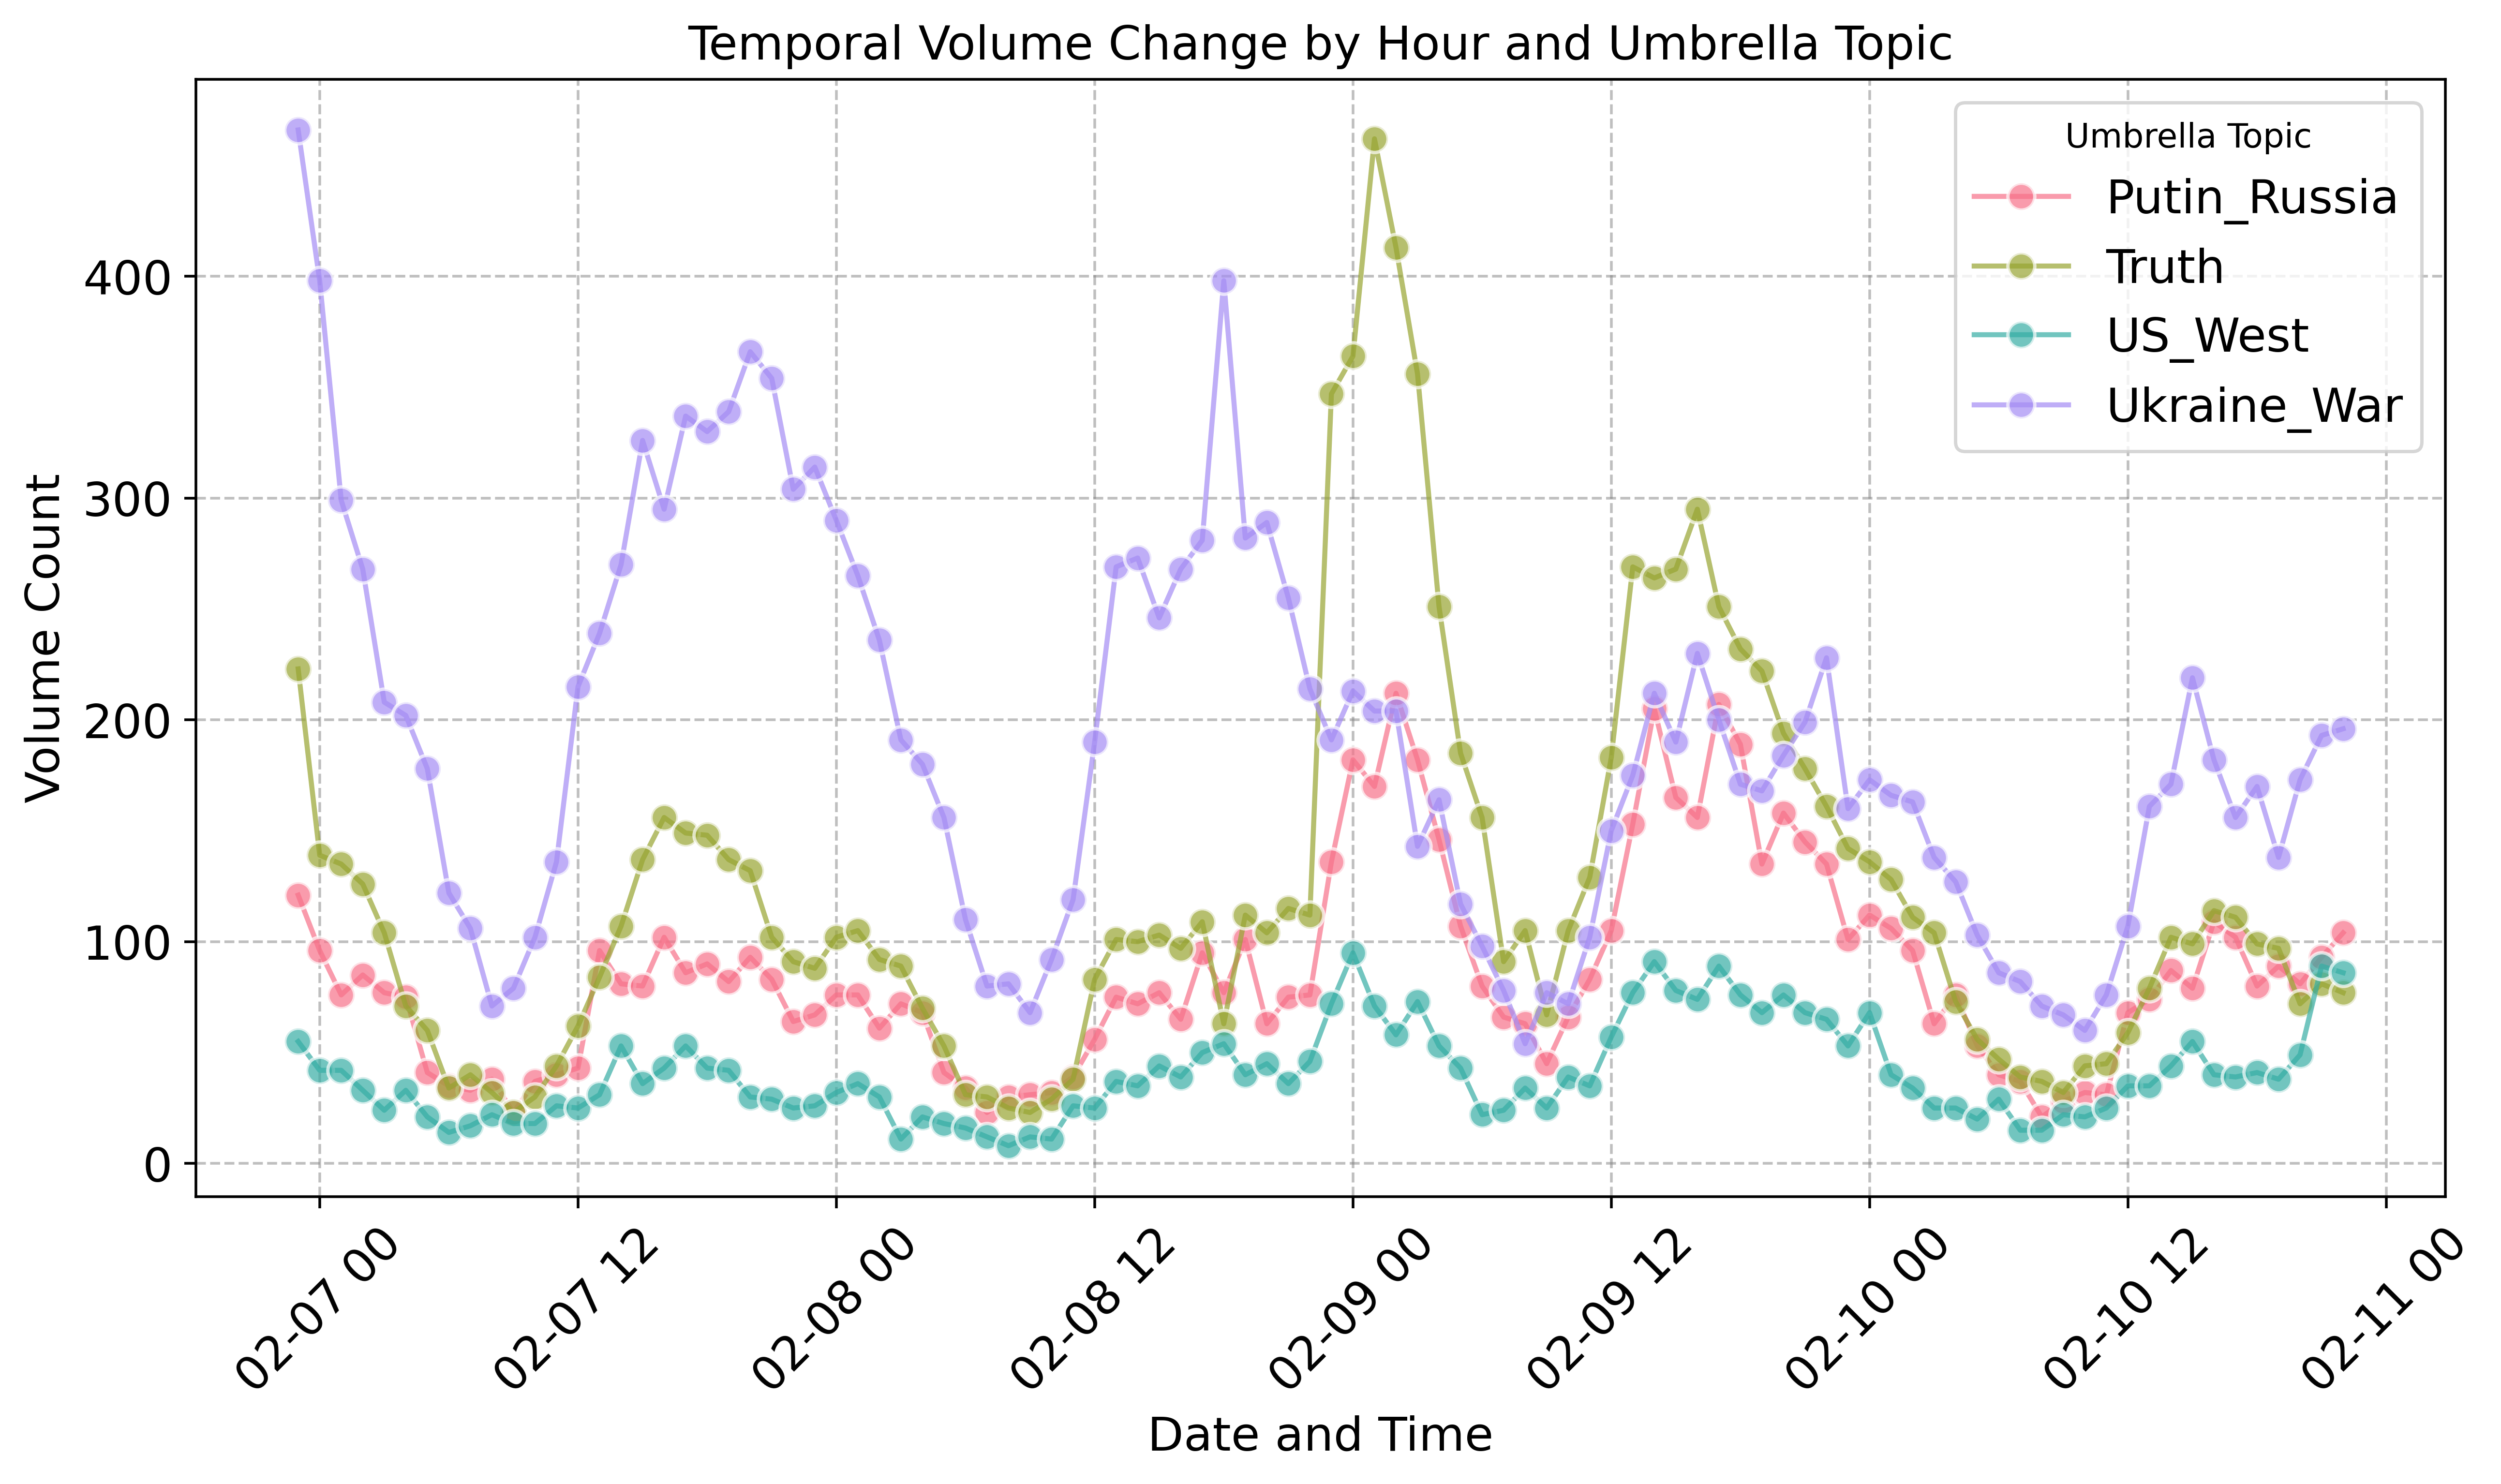

In [ ]:
def plot_temporal_volume_change(df, umbrella_topics):
    """Plot the temporal volume change for the umbrella topics."""

    # Add a new column for umbrella topics
    df['UmbrellaTopic'] = df['Topic'].map(lambda x: next((k for k, v in umbrella_topics.items() if x in v), 'Other'))

    # Filter out topics that are not part of any umbrella topic
    df_filtered = df[df['UmbrellaTopic'] != 'Other']

    # Convert 'DateTime' to datetime format and extract date and hour
    df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])
    df_filtered['Date'] = df_filtered['DateTime'].dt.date
    df_filtered['Hour'] = df_filtered['DateTime'].dt.hour

    # Aggregate counts by date, hour, and umbrella topic
    df_grouped = df_filtered.groupby(['Date', 'Hour', 'UmbrellaTopic']).size().reset_index(name='Count')

    # Combine Date and Hour into a single datetime column for x-axis
    df_grouped['DateTime'] = pd.to_datetime(df_grouped['Date'].astype(str) + ' ' + df_grouped['Hour'].astype(str) + ':00')

    # Define a custom color palette
    custom_palette = sns.color_palette("husl", n_colors=df_grouped['UmbrellaTopic'].nunique())

    # Create the plot
    plt.figure(figsize=(12, 6))

    sns.lineplot(
        data=df_grouped,
        x='DateTime',
        y='Count',
        hue='UmbrellaTopic',
        palette=custom_palette,
        marker='o',
        linewidth=1.5,
        alpha=0.7,
        markersize=8,
        markeredgewidth=1
    )

    plt.title('Temporal Volume Change by Hour and Umbrella Topic')
    plt.xlabel('Date and Time')
    plt.ylabel('Volume Count')
    plt.xticks(rotation=45)
    plt.legend(title='Umbrella Topic')
    plt.grid(True, linestyle='--', color='gray', alpha=0.5)
    plt.show()


# Example usage
umbrella_topics = {
    'Putin_Russia': [5, 22, 23, 26, 35, 38, 41],
    'US_West': [6, 23, 25, 35, 39],
    'Ukraine_War': [1, 2, 8, 9, 11, 17, 20, 23, 24, 28, 33, 40],
    'Truth': [0, 3, 5, 12, 15, 19, 34, 47, 48, 49]
}

plot_temporal_volume_change(df2, umbrella_topics)